In [1]:
import tensorflow as tf

In [2]:
#Loading the fashion MNIST dataset
fmnist_df = tf.keras.datasets.fashion_mnist

#SSL/TLS certificate verification failed for api.github.com
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Loading the dataset
(train_images, train_labels), (test_images, test_labels) = fmnist_df.load_data()




(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


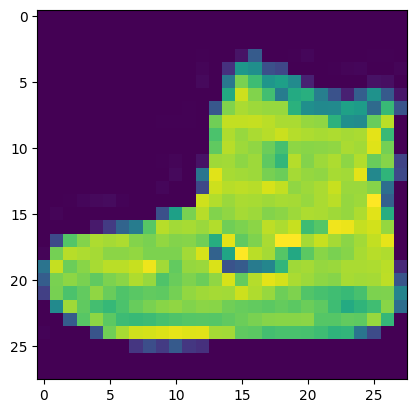

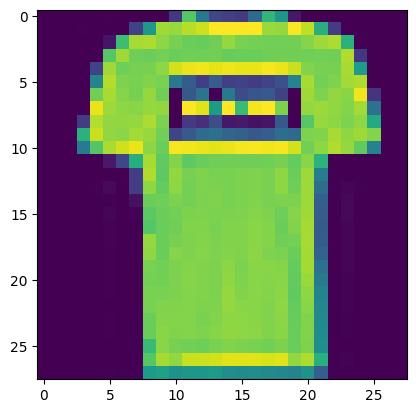

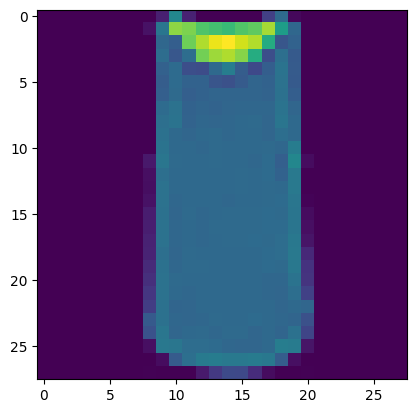

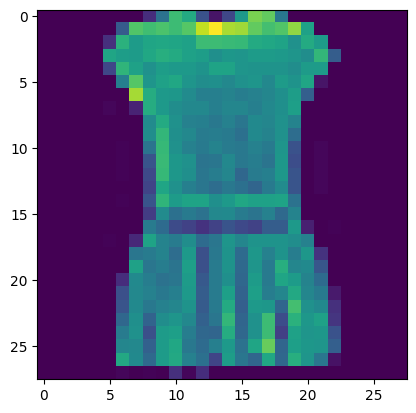

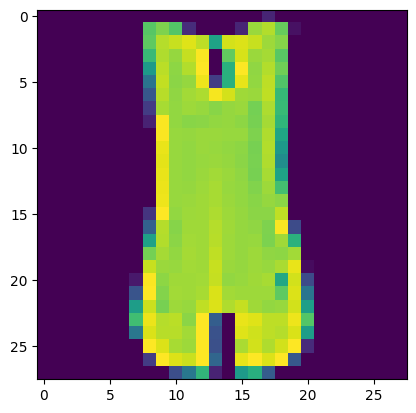

[9 0 0 3 0]
Labels for the above images:  [9 0 0 3 0]


In [3]:
#Viewiwing the dataset
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

#Viewing the first five images on a single plot
import matplotlib.pyplot as plt
for i in range(5):
    plt.imshow(train_images[i])
    plt.show()
    
#Viewing the first five labels
print(train_labels[0:5])

#examine the labels related to the above images
import numpy as np
np.unique(train_labels)
print("Labels for the above images: ", train_labels[0:5])


***Which means the dataset has total of 70,000 images having dimensions 28x28 pixels. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255.*** 

In [4]:
#Understanding the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


**Scaling the dataset pixel values from value 0 to 1 helps better train the model**

In [5]:
#Preprocessing the data (scaling the pixel values to a range of 0 to 1)
train_images = train_images / 255.0
test_images = test_images / 255.0


In [6]:
#Checking the balancedness of the dataset
import pandas as pd
pd.Series(train_labels).value_counts()


9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

**Which provides us with info that the dataset is balanced**

***Now training a dense neural network***

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers.legacy import Adam
# Define hyperparameter configurations
hyperparams = [
    {'units': 128, 'activation': 'relu', 'optimizer': Adam(learning_rate=0.001)},
    {'units': 256, 'activation': 'relu', 'optimizer': Adam(learning_rate=0.01)},
    {'units': 64, 'activation': 'sigmoid', 'optimizer': Adam(learning_rate=0.001)}
]

# Training loop for different hyperparameter configurations

# Training loop for different hyperparameter configurations
for idx, hp in enumerate(hyperparams):
    print(f"Training model {idx + 1} with hyperparameters: {hp}")
    
    # Build the model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(hp['units'], activation=hp['activation']),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=hp['optimizer'],
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test accuracy: {test_acc}\n")

Training model 1 with hyperparameters: {'units': 128, 'activation': 'relu', 'optimizer': <keras.src.optimizers.legacy.adam.Adam object at 0x2eed56d10>}
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5476 - accuracy: 0.8097
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4749 - accuracy: 0.8342
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4616 - accuracy: 0.8411
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4617 - accuracy: 0.8408
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4679 - accuracy: 0.8405
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4659 - accuracy: 0.8420
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4761 - accuracy: 0.8395
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4827 - accuracy: 0.8386
Epoch 9/10
1875/1875 [==========

**From the numbers we can obbserve that model 3 with hyperparameters ***(units': 64, 'activation': 'sigmoid', 'optimizer': Adam(learning_rate=0.001))*** is better among the three with the accuracy of 87.44%**

313/313 [==============================] - 0s 1ms/step


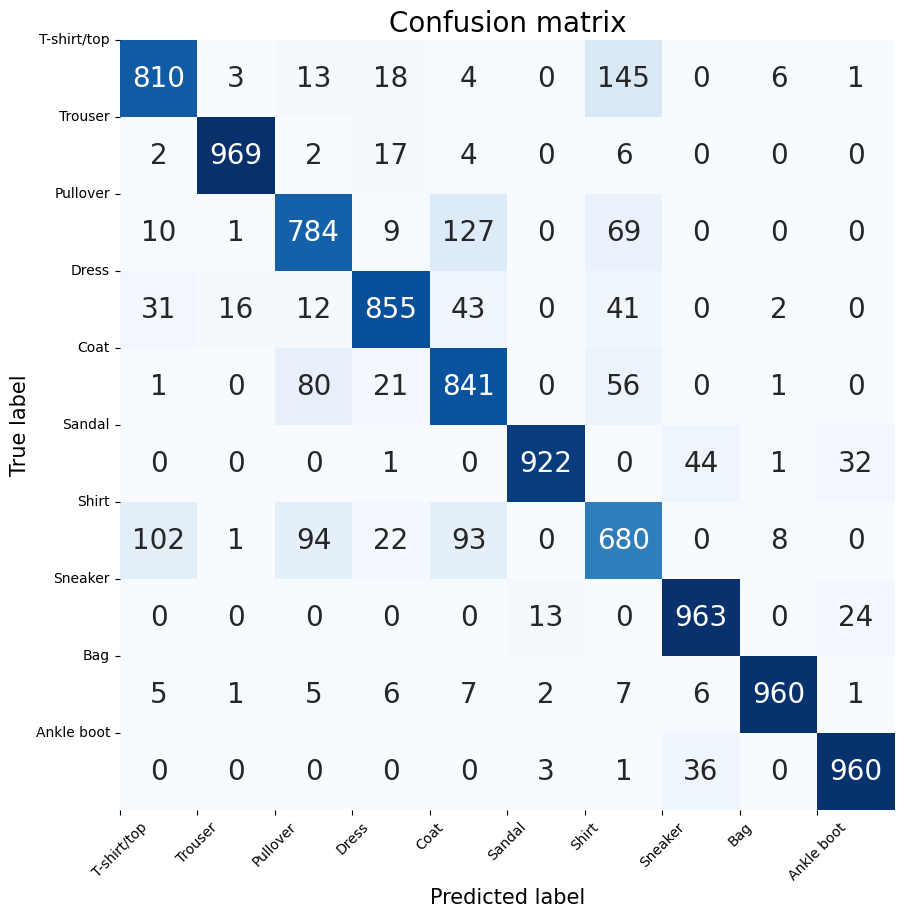

In [23]:
# Generate confusion matrix for the best model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False, annot_kws={"size": 20})
plt.title("Confusion matrix", fontsize=20)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names, fontsize=10, rotation=45)
plt.yticks(tick_marks, class_names, fontsize=10, rotation=0)
plt.show()

**From the confusion matric numbers it can be seen that model struggled between predicting Tshirt/top images as shirt, also at instances predicting pullover as coat and vice versa**

**Following are some of the images misclassified by the model**

[  17   25   29 ... 9977 9979 9989]
1256


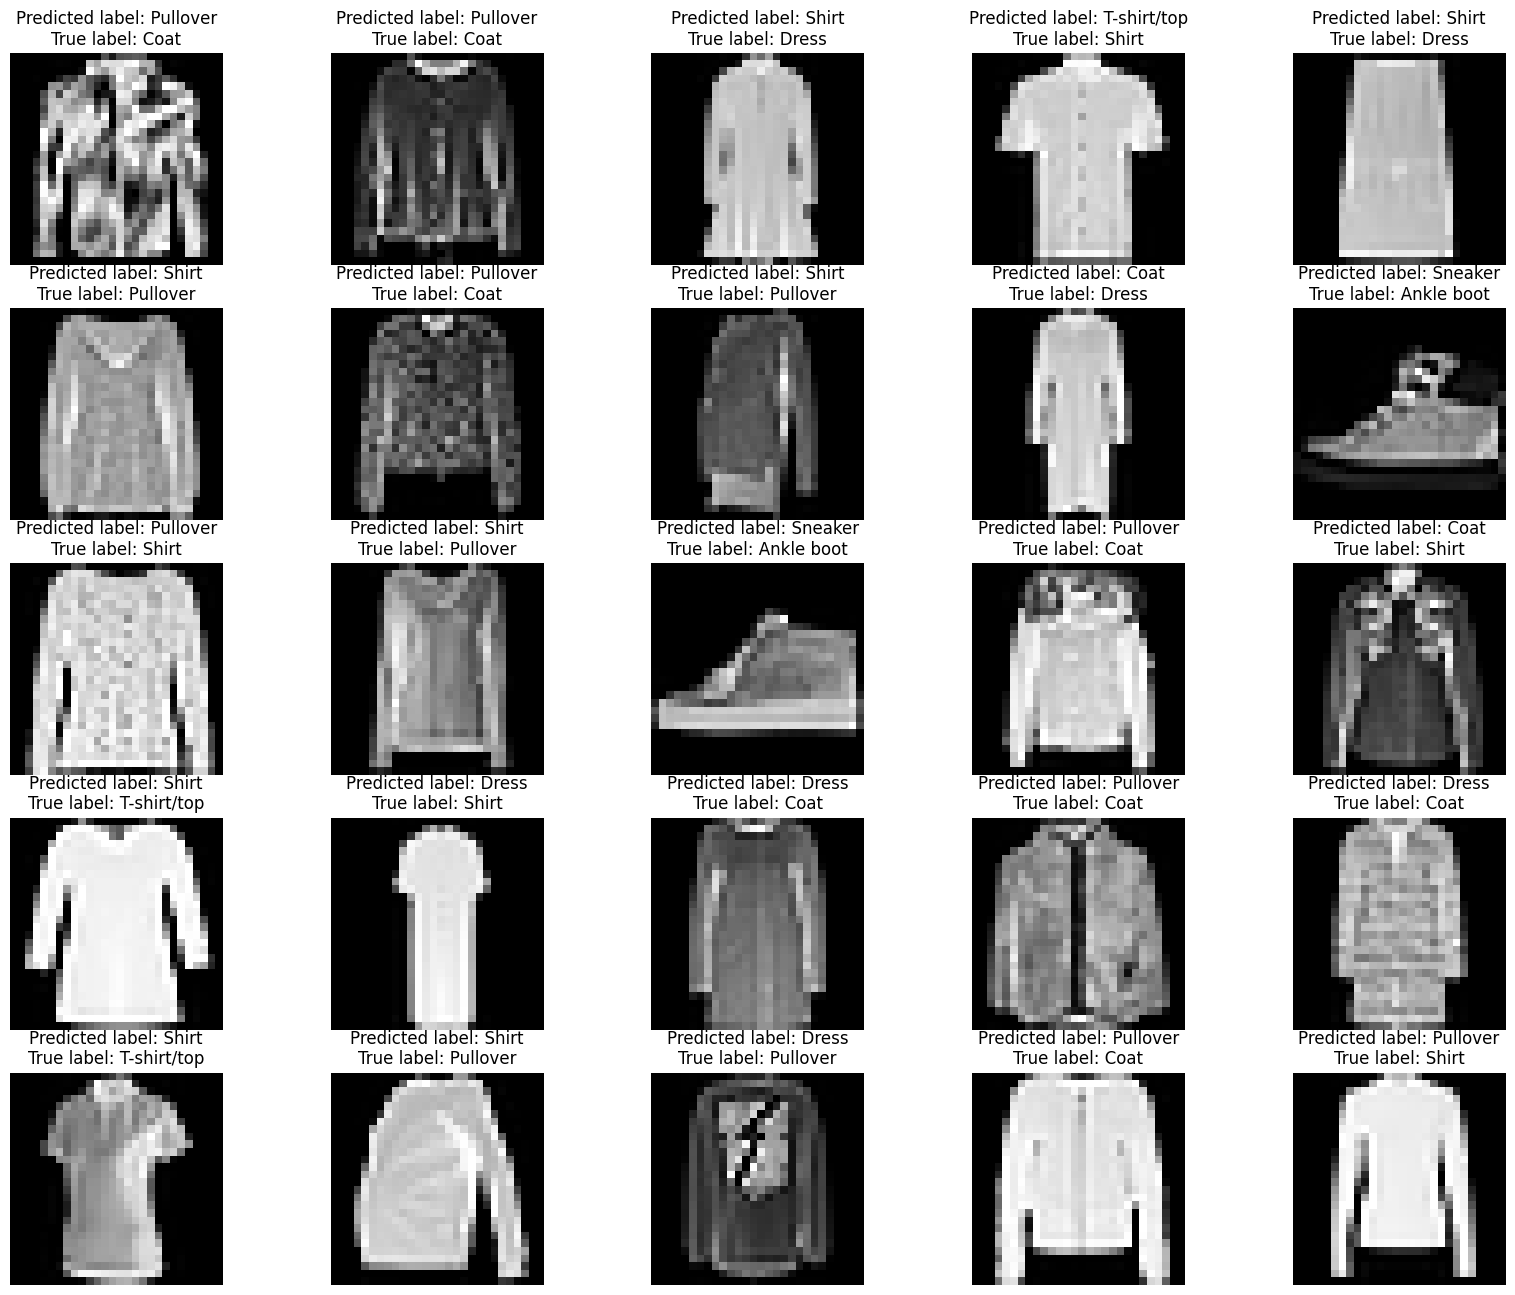

In [28]:
#Find indices of misclassified images
misclassified_idx = np.where(y_pred != test_labels)[0]
print(misclassified_idx)

#Number of misclassified images
print(len(misclassified_idx))

#Plotting the first 25 misclassified images
plt.figure(figsize=(20, 16))
for i, idx in enumerate(misclassified_idx[0:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"Predicted label: {class_names[y_pred[idx]]}\nTrue label: {class_names[test_labels[idx]]}")
    plt.axis('off')
plt.show()


As we can see the total number of misclassified instances were 1256

**Just trying some CNN model with and without dropouts to check the difference in their performances**

In [12]:
#Training a CNN model with and without dropout
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam

# Build the model without dropout
model_without_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Build the model with dropout
model_with_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_without_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_with_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Reshape the data for CNN
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Train the models
model_without_dropout.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))
model_with_dropout.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the models
print("Model without dropout")
model_without_dropout.evaluate(test_images, test_labels)

print("\nModel with dropout")
model_with_dropout.evaluate(test_images, test_labels)


Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4599 - accuracy: 0.8340 - val_loss: 0.3845 - val_accuracy: 0.8650
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3217 - accuracy: 0.8846 - val_loss: 0.3095 - val_accuracy: 0.8911
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2969 - accuracy: 0.8938 - val_loss: 0.3403 - val_accuracy: 0.8836
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2994 - accuracy: 0.8977 - val_loss: 0.3628 - val_accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3416 - accuracy: 0.8952 - val_loss: 0.3981 - val_accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4550 - accuracy: 0.8870 - val_loss: 0.5888 - val_accuracy: 0.8636
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6444 - accuracy: 0.8834 - val_loss: 0.9172 - val_ac

[6.9319539070129395, 0.8343999981880188]

**Here the CNN model without dropout performed better with low loss and high accuracy then model with dropout**

**Changing the architecture of dropout in the model**

In [30]:
# Build the model with dropout and some modifications to the architecture
model_with_dropout = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dropout(0.6),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_with_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
model_with_dropout.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate the model
model_with_dropout.evaluate(test_images, test_labels)


Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4501 - accuracy: 0.8375 - val_loss: 0.4364 - val_accuracy: 0.8699
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3459 - accuracy: 0.8783 - val_loss: 0.3618 - val_accuracy: 0.8813
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3976 - accuracy: 0.8744 - val_loss: 0.3345 - val_accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.5811 - accuracy: 0.8623 - val_loss: 0.4239 - val_accuracy: 0.8723
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.2573 - accuracy: 0.8473 - val_loss: 0.7630 - val_accuracy: 0.8598
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.5746 - accuracy: 0.8446 - val_loss: 1.4970 - val_accuracy: 0.8709
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 5.1921 - accuracy: 0.8399 - val_loss: 3.7781 - val_ac

[11.616273880004883, 0.8456000089645386]

Which shows changing the architecture affects the model performance. Fine tuning the model more may results us with some better results.